In [15]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')

In [16]:
df.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
152102,Senior Data Analyst,Senior Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-11-15 08:29:58,False,False,Singapore,NaN,NaN,NaN,Alphax Coders Pte. Ltd.,NaN,NaN
561025,Data Analyst,Data analysis and research specialist,"Doha, Qatar",via BeBee دولة قطر,Full-time,False,Qatar,2023-10-18 04:40:56,True,False,Qatar,NaN,NaN,NaN,University of Doha for Science and Technology ...,NaN,NaN
622001,Data Engineer,data engineer,Türkiye,via Indeed,Full-time,False,Turkey,2023-09-26 12:28:31,True,False,Turkey,NaN,NaN,NaN,Randstad,"['shell', 'java', 'python', 'unix', 'ssis', 'f...","{'analyst_tools': ['ssis'], 'os': ['unix'], 'o..."
685976,Data Analyst,Senior HR Metrics and Data Analyst,"McLean, VA",via Monster,Full-time,False,"New York, United States",2023-04-21 10:00:18,False,True,United States,NaN,NaN,NaN,Eliassen Group,"['sql', 'oracle', 'azure', 'dax', 'power bi']","{'analyst_tools': ['dax', 'power bi'], 'cloud'..."


In [17]:
df['job_skills'][2]

"['python', 'sql', 'c#', 'azure', 'airflow', 'dax', 'docker', 'kubernetes', 'jenkins']"

In [18]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_month_num'] = df['job_posted_date'].dt.month
df['job_posted_month'] = pd.to_datetime(df['job_month_num'], format='%m').dt.strftime('%b')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [22]:
df.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
396033,Software Engineer,Jr Systems Analyst/Admin,Anywhere,via LinkedIn,Contractor,True,Canada,2023-07-19 18:13:23,True,False,Canada,NaN,NaN,NaN,S.i. Systems,"[groovy, java, python, c#, sql, mysql, oracle]","{'cloud': ['oracle'], 'databases': ['mysql'], ...",7,Jul
142523,Data Scientist,Data Science Internship,"Madrid, Spain",via BeBee,Internship,False,Spain,2023-12-05 08:24:41,False,False,Spain,NaN,NaN,NaN,EY,"[python, scala, r, matlab, sql]","{'programming': ['python', 'scala', 'r', 'matl...",12,Dec
210505,Data Engineer,Visser & Van Baars - Data Engineer. Job in Ant...,"Antwerp, Belgium",via My Valley Jobs Today,Full-time,False,Belgium,2023-04-26 23:33:52,True,False,Belgium,NaN,NaN,NaN,Visser & Van Baars,"[sql, sql server, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'da...",4,Apr
727047,Data Analyst,Senior Associate Data Informatics Analyst,"Madrid, Spain",via Trabajo.org,Full-time,False,Spain,2023-02-09 05:45:32,False,False,Spain,NaN,NaN,NaN,NTT,"[mysql, oracle]","{'cloud': ['oracle'], 'databases': ['mysql']}",2,Feb


In [25]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [36]:
df_da_ind = df[(df['job_country'] == 'India') & (df['job_title_short'] =='Data Analyst')].copy()
df_da_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6121 entries, 38 to 785715
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        6121 non-null   object        
 1   job_title              6121 non-null   object        
 2   job_location           6121 non-null   object        
 3   job_via                6121 non-null   object        
 4   job_schedule_type      6102 non-null   object        
 5   job_work_from_home     6121 non-null   bool          
 6   search_location        6121 non-null   object        
 7   job_posted_date        6121 non-null   datetime64[ns]
 8   job_no_degree_mention  6121 non-null   bool          
 9   job_health_insurance   6121 non-null   bool          
 10  job_country            6121 non-null   object        
 11  salary_rate            97 non-null     object        
 12  salary_year_avg        94 non-null     float64       
 13  salar

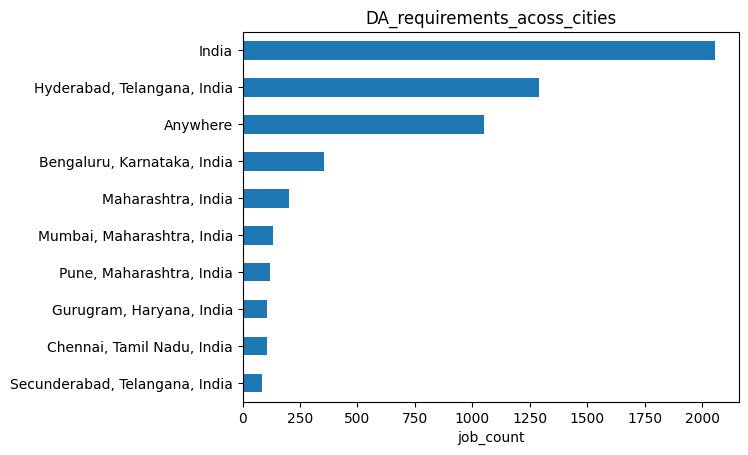

In [60]:
top_job_city = df_da_ind['job_location'].value_counts().to_frame().head(10)
top_job_city.reset_index(inplace=True)
top_job_city.plot(kind='barh', x= 'job_location', y = 'count')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('job_count')
plt.legend().set_visible(False)
plt.title('DA_requirements_acoss_cities')
plt.show()



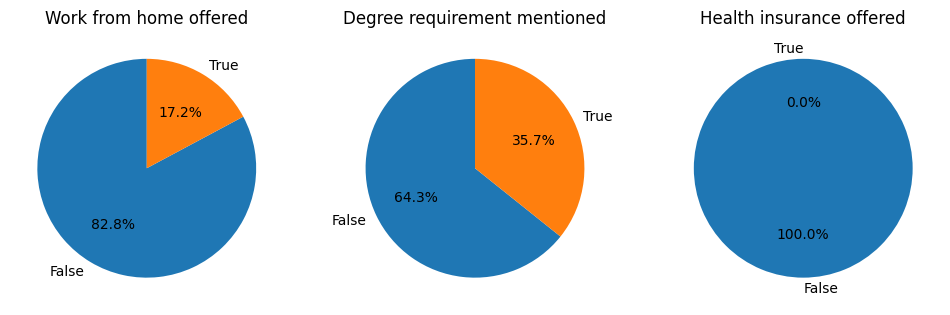

In [66]:
dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention': 'Degree requirement mentioned',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_da_ind[column].value_counts().reindex([False, True], fill_value=0)
    
    ax[i].pie(
        counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)

plt.show()


In [67]:
df_da_ind.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_num,job_posted_month
523246,Data Analyst,Data Analyst || 1 Year,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-09-09 11:10:27,False,False,India,NaN,NaN,NaN,Geekster,"[sql, python, firebase, firebase, tableau]","{'analyst_tools': ['tableau'], 'cloud': ['fire...",9,Sep
274908,Data Analyst,Data & Analytics Manager,Anywhere,via LinkedIn,Full-time,True,India,2023-07-04 07:12:45,False,False,India,NaN,NaN,NaN,Freedom Property Investors,"[python, r, power bi]","{'analyst_tools': ['power bi'], 'programming':...",7,Jul
254368,Data Analyst,Oracle Data Analyst,"Secunderabad, Telangana, India",via BeBee India,Full-time,False,India,2023-09-16 07:09:35,True,False,India,NaN,NaN,NaN,Kastech Software Solutions India,[oracle],{'cloud': ['oracle']},9,Sep
763999,Data Analyst,Data Analyst,India,via Jooble,Full-time,False,India,2023-05-03 20:37:35,False,False,India,NaN,NaN,NaN,Flutter,"[sql, python, db2, sql server, azure, flutter,...","{'analyst_tools': ['excel', 'powerpoint', 'wor...",5,May
591117,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-01-09 09:11:54,False,False,India,NaN,NaN,NaN,Cyient,NaN,NaN,1,Jan


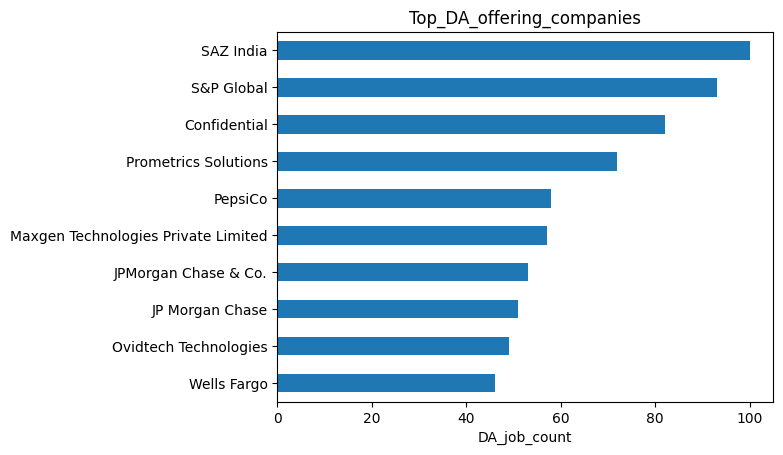

In [79]:
top_available_company = df_da_ind['company_name'].value_counts().head(10).to_frame()
top_available_company.reset_index(inplace=True)
top_available_company.plot(kind='barh',x= 'company_name', y= 'count')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.xlabel('DA_job_count')
plt.legend().set_visible(False)
plt.title('Top_DA_offering_companies')
plt.show()
